# Temperature Forecast

In [2]:
# Import libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset

tempds = pd.read_csv('temperature.csv')
tempds

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


This dataset contain 7752 rows and 25 columns.

# Performing EDA

In [4]:
tempds.shape

(7752, 25)

In [5]:
tempds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
tempds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
tempds.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

as per above we can see that there are 2 types of data (float and object.)

In [8]:
# Changing datatype of data column from object to datatime

tempds['Date'] = pd.to_datetime(tempds.Date , format = '%d-%m-%Y')
tempds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

above we can see that data column data type is changed to datetime.

In [9]:
tempds.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
# removing nan values from date.

tempds['Date'] = tempds['Date'].fillna(tempds['Date'].median())

In [11]:
# setting Date column as index column

tempds.set_index('Date' , inplace=True)

In [12]:
tempds

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30 00:00:00,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
2013-06-30 00:00:00,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2013-06-30 00:00:00,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
2013-06-30 00:00:00,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
2013-06-30 00:00:00,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30 00:00:00,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
2017-08-30 00:00:00,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
2017-08-30 00:00:00,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [36]:
tempds.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


It is statistical presentation of numerical columns.

As per above we can see there is not much difference between mean and median.

Here we can also observe that there is difference between 75% and max mean there is outlier present in the dataset.

In above we can also see get max and 75 , std of the dataset.

In [37]:
# Checking columns in list form

tempds.columns.tolist()

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [38]:
# checking Null values 

tempds.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

as per above we can see that there is null value present in the dataset.

<AxesSubplot:ylabel='Date'>

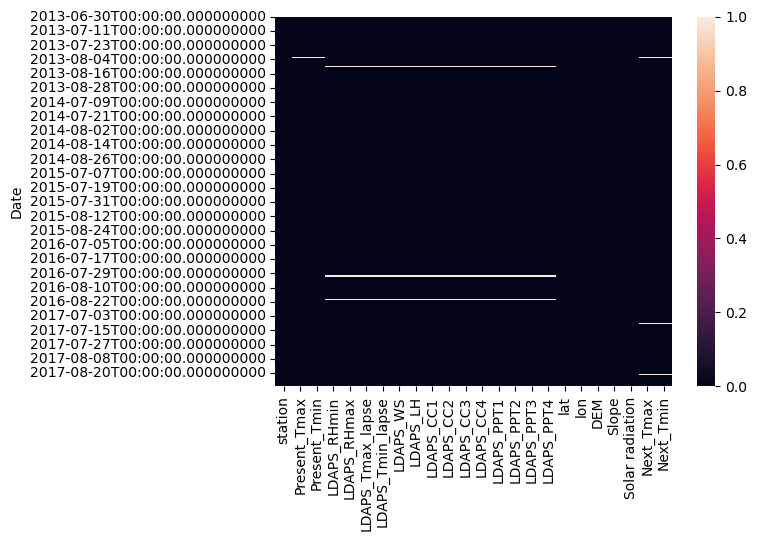

In [39]:
# heatmap for null values

sns.heatmap(tempds.isnull())

# Use of Label Encoder

Here we will use label encoder to encode the data and also remove the nan values.

In [40]:
import sklearn
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [41]:
le = LabelEncoder()

In [42]:
columns=['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation','Next_Tmax', 'Next_Tmin']

tempds[columns] = tempds[columns].apply(le.fit_transform)
tempds

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30 00:00:00,0,80,73,4445,4440,2281,2868,4328,4818,2744,...,0,0,0,9,11,24,23,1574,92,75
2013-06-30 00:00:00,1,112,75,3258,4181,3984,4228,1943,3348,2643,...,0,0,0,9,16,11,10,1531,106,88
2013-06-30 00:00:00,2,109,92,2472,1848,4243,5013,2957,733,2436,...,0,0,0,8,19,9,6,1517,112,102
2013-06-30 00:00:00,3,113,93,4441,6943,3839,3267,1869,4568,2534,...,0,0,0,11,14,12,21,1500,118,106
2013-06-30 00:00:00,4,107,78,4047,3993,3253,3465,2037,6845,1863,...,0,0,0,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30 00:00:00,22,26,30,44,899,1042,268,2982,4990,387,...,0,0,0,6,2,1,4,30,84,44
2017-08-30 00:00:00,23,26,36,14,681,1442,263,3828,2866,470,...,0,0,0,5,3,2,5,26,87,51
2017-08-30 00:00:00,24,25,33,12,670,2146,232,4963,41,682,...,0,0,0,5,9,3,7,35,79,37


In [43]:
# checking the null values again
tempds.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

now we see that there is no null values present in dataset now .

In [44]:
# checking the values counts of each column

for i in tempds.columns:
    print(tempds[i].value_counts()) # this is checking the frequency 
    print('\n')

0     310
1     310
24    310
23    310
22    310
21    310
20    310
19    310
18    310
17    310
16    310
15    310
14    310
13    310
12    310
11    310
10    310
9     310
8     310
7     310
6     310
5     310
4     310
3     310
2     310
25      2
Name: station, dtype: int64


107    112
87     111
84     108
90     107
112    105
      ... 
162      1
6        1
1        1
157      1
2        1
Name: Present_Tmax, Length: 168, dtype: int64


99     161
97     153
90     144
94     143
92     142
      ... 
2        1
4        1
150      1
153      1
9        1
Name: Present_Tmin, Length: 156, dtype: int64


7672    75
6852     2
7671     2
0        2
3156     2
        ..
3414     1
4776     1
2076     1
3249     1
12       1
Name: LDAPS_RHmin, Length: 7673, dtype: int64


7664    75
6953     2
7524     2
7663     2
6285     2
        ..
7017     1
5943     1
7067     1
5612     1
670      1
Name: LDAPS_RHmax, Length: 7665, dtype: int64


7675    75
0        2
7674     2
2

in above step we see that there is no blank space or white space .

In [45]:
# checking correlation

tempds_corr=tempds.corr()
tempds_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.104933,0.123436,-0.062920,-0.167790,0.065100,0.105351,0.018081,-0.125543,0.009277,...,-0.009043,-0.016763,-0.004407,-0.182982,-0.150652,-0.295155,-0.118362,-0.022353,0.103684,0.123832
Present_Tmax,0.104933,1.000000,0.640927,-0.177683,-0.310114,0.534000,0.600360,-0.102590,0.125083,-0.280864,...,-0.126663,-0.092402,-0.088995,-0.041170,0.012451,-0.131855,-0.107263,-0.076217,0.589872,0.604751
Present_Tmin,0.123436,0.640927,1.000000,0.143945,-0.019876,0.437462,0.736169,0.015461,0.002639,0.111036,...,0.111892,0.022122,-0.054918,-0.057044,-0.038819,-0.226827,-0.171591,-0.040949,0.457094,0.772553
LDAPS_RHmin,-0.062920,-0.177683,0.143945,1.000000,0.607000,-0.532164,0.106593,0.257162,0.010430,0.619485,...,0.582263,0.474466,0.337598,0.053482,-0.072233,0.064695,0.064442,0.193529,-0.397095,0.117153
LDAPS_RHmax,-0.167790,-0.310114,-0.019876,0.607000,1.000000,-0.376038,-0.153906,0.159442,0.261349,0.467623,...,0.455957,0.312325,0.225210,0.176159,0.025133,0.172553,0.178126,0.149073,-0.299132,-0.086424
LDAPS_Tmax_lapse,0.065100,0.534000,0.437462,-0.532164,-0.376038,1.000000,0.620402,-0.202491,0.062275,-0.388311,...,-0.361015,-0.266691,-0.198074,-0.016746,0.091381,-0.121854,-0.100891,-0.057070,0.803809,0.556760
LDAPS_Tmin_lapse,0.105351,0.600360,0.736169,0.106593,-0.153906,0.620402,1.000000,-0.012824,-0.101967,0.062630,...,0.034648,-0.023152,-0.088875,-0.068799,-0.029010,-0.186134,-0.163852,-0.018435,0.572926,0.852314
LDAPS_WS,0.018081,-0.102590,0.015461,0.257162,0.159442,-0.202491,-0.012824,1.000000,-0.019334,0.272690,...,0.280262,0.202883,0.265873,0.006947,-0.084859,0.107062,0.113362,0.170773,-0.260296,-0.023647
LDAPS_LH,-0.125543,0.125083,0.002639,0.010430,0.261349,0.062275,-0.101967,-0.019334,1.000000,-0.100856,...,-0.046622,0.050231,0.094295,0.047836,0.063607,0.083834,0.015992,-0.064718,0.156433,-0.045685
LDAPS_CC1,0.009277,-0.280864,0.111036,0.619485,0.467623,-0.388311,0.062630,0.272690,-0.100856,1.000000,...,0.610765,0.362643,0.287491,-0.009695,-0.009477,-0.016670,-0.019247,0.179867,-0.398914,0.034939


In [46]:
# checking number of unique values in each column

tempds.nunique().to_frame('No. of unique values')

,No. of unique values
station,26
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676
LDAPS_CC1,7570


in above detail we see that unique value is present in each columns.

In [47]:
tempds.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Data Visualization

1.Univariate Analysis

0     310
1     310
24    310
23    310
22    310
21    310
20    310
19    310
18    310
17    310
16    310
15    310
14    310
13    310
12    310
11    310
10    310
9     310
8     310
7     310
6     310
5     310
4     310
3     310
2     310
25      2
Name: station, dtype: int64


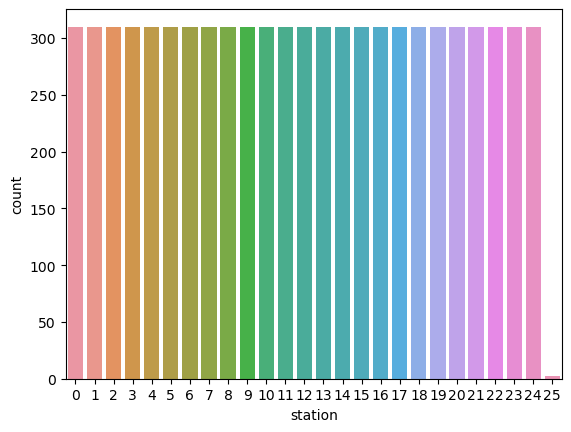

In [48]:
sns.countplot(tempds['station'])
print(tempds['station'].value_counts())

in this plot we can see that all the points has equal data.

107    112
87     111
84     108
90     107
112    105
      ... 
162      1
6        1
1        1
157      1
2        1
Name: Present_Tmax, Length: 168, dtype: int64


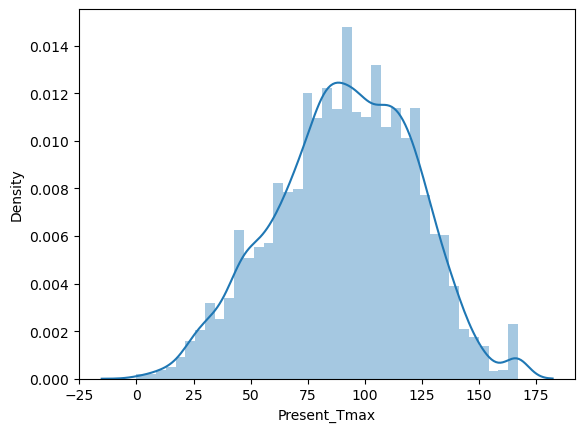

In [49]:
sns.distplot(tempds['Present_Tmax'])
print(tempds['Present_Tmax'].value_counts())

In this plot we can see that between 75 to 100 has the highest value .

99     161
97     153
90     144
94     143
92     142
      ... 
2        1
4        1
150      1
153      1
9        1
Name: Present_Tmin, Length: 156, dtype: int64


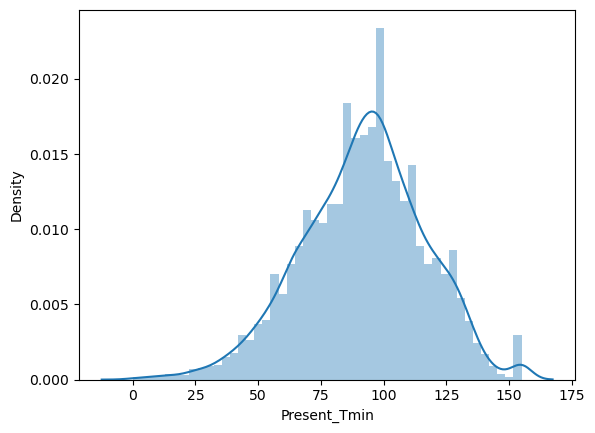

In [50]:
sns.distplot(tempds['Present_Tmin'])
print(tempds['Present_Tmin'].value_counts())

in this plot we see that 100 has the highest value .

7672    75
6852     2
7671     2
0        2
3156     2
        ..
3414     1
4776     1
2076     1
3249     1
12       1
Name: LDAPS_RHmin, Length: 7673, dtype: int64


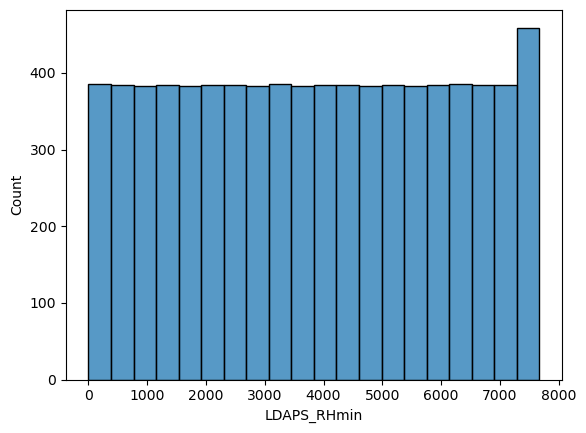

In [51]:
sns.histplot(tempds['LDAPS_RHmin'])
print(tempds['LDAPS_RHmin'].value_counts())

In the above plot we see that all the point has equal data but only one point has highest data.

7664    75
6953     2
7524     2
7663     2
6285     2
        ..
7017     1
5943     1
7067     1
5612     1
670      1
Name: LDAPS_RHmax, Length: 7665, dtype: int64


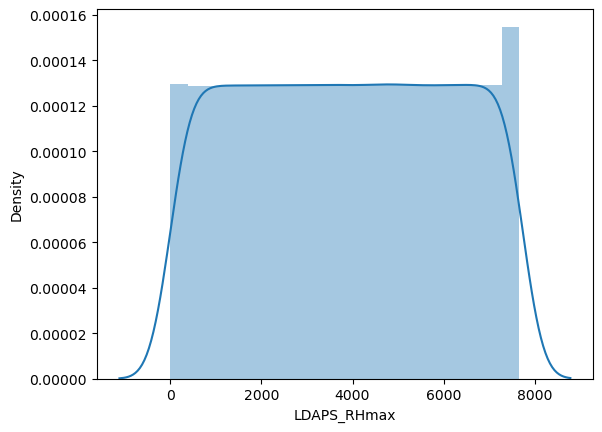

In [52]:
sns.distplot(tempds['LDAPS_RHmax'])
print(tempds['LDAPS_RHmax'].value_counts())

In this above plot we can see that values is equal for all.

7675    75
0        2
7674     2
2281     1
6884     1
        ..
2071     1
1425     1
3222     1
2402     1
2146     1
Name: LDAPS_Tmax_lapse, Length: 7676, dtype: int64


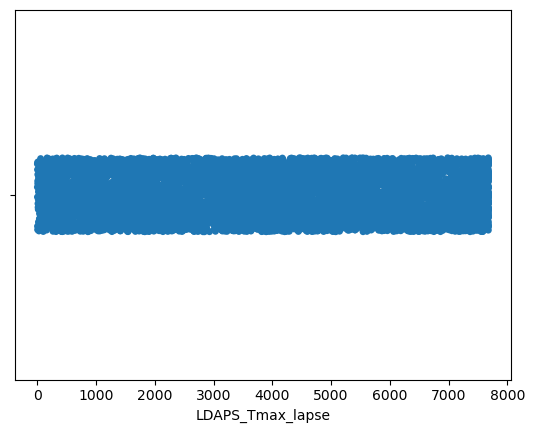

In [53]:
sns.stripplot(tempds['LDAPS_Tmax_lapse'])
print(tempds['LDAPS_Tmax_lapse'].value_counts())

In this plot we can see that equal value distributed.

7675    75
7674     2
0        2
2868     1
3963     1
        ..
369      1
247      1
359      1
303      1
232      1
Name: LDAPS_Tmin_lapse, Length: 7676, dtype: int64


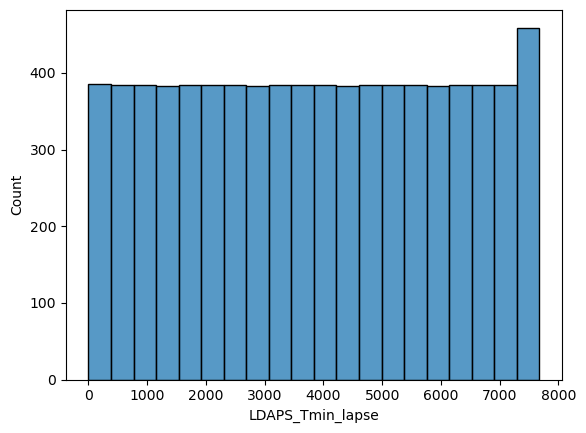

In [54]:
sns.histplot(tempds['LDAPS_Tmin_lapse'])
print(tempds['LDAPS_Tmin_lapse'].value_counts())

As per above we can see that plot has equal distributed data but there is only one highest value.

7675    75
7674     2
0        2
4328     1
5453     1
        ..
3552     1
2394     1
2942     1
3577     1
4963     1
Name: LDAPS_WS, Length: 7676, dtype: int64


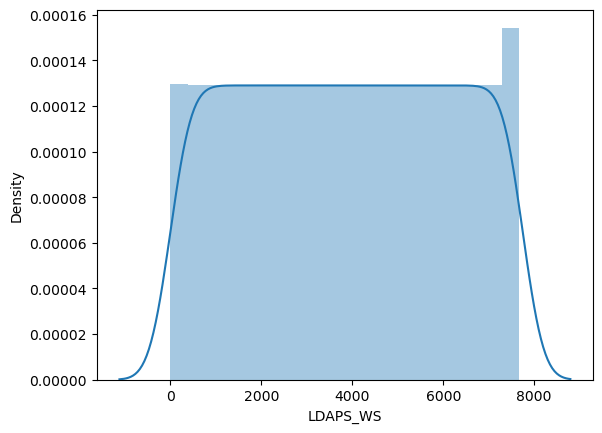

In [55]:
sns.distplot(tempds['LDAPS_WS'])
print(tempds['LDAPS_WS'].value_counts())

In the above plot we see that it has equal values all over columns.

7675    75
0        2
7674     2
4818     1
1852     1
        ..
7417     1
6870     1
977      1
5045     1
41       1
Name: LDAPS_LH, Length: 7676, dtype: int64


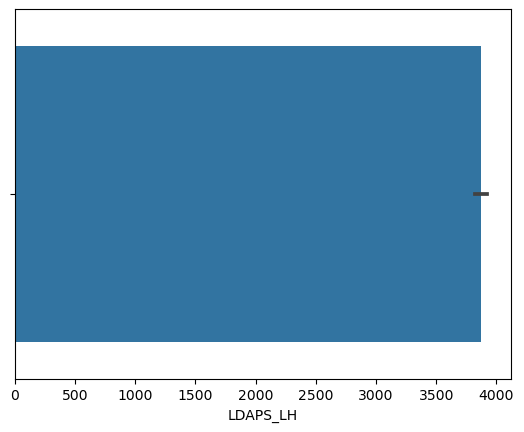

In [56]:
sns.barplot(tempds['LDAPS_LH'])
print(tempds['LDAPS_LH'].value_counts())

0       108
7569     75
7568      2
2744      1
4319      1
       ... 
3865      1
4033      1
4455      1
4447      1
682       1
Name: LDAPS_CC1, Length: 7570, dtype: int64


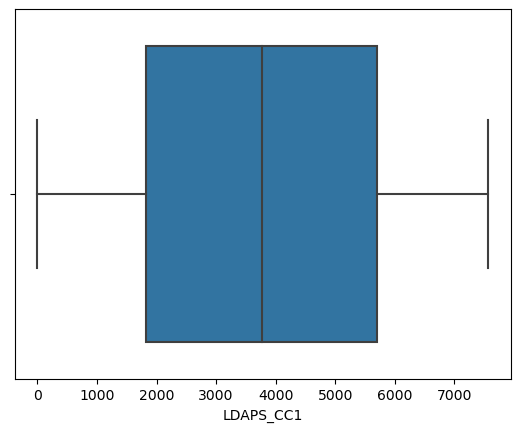

In [57]:
sns.boxplot(tempds['LDAPS_CC1'])
print(tempds['LDAPS_CC1'].value_counts())

0       95
7582    75
7581     2
2576     1
1930     1
        ..
4066     1
4166     1
4586     1
1261     1
898      1
Name: LDAPS_CC2, Length: 7583, dtype: int64


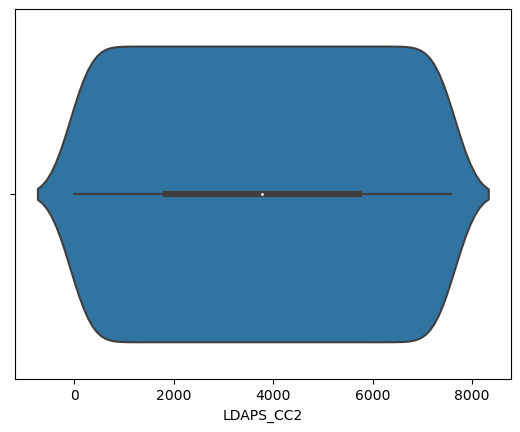

In [58]:
sns.violinplot(tempds['LDAPS_CC2'])
print(tempds['LDAPS_CC2'].value_counts())

0       76
7599    75
94       2
7598     2
1        2
        ..
875      1
659      1
789      1
439      1
2        1
Name: LDAPS_CC3, Length: 7600, dtype: int64


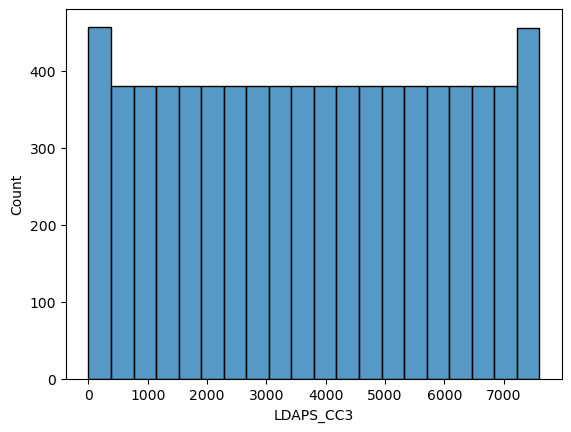

In [59]:
sns.histplot(tempds['LDAPS_CC3'])
print(tempds['LDAPS_CC3'].value_counts())

0       137
7524     75
192       7
152       3
293       3
       ... 
2041      1
1312      1
1210      1
1298      1
96        1
Name: LDAPS_CC4, Length: 7525, dtype: int64


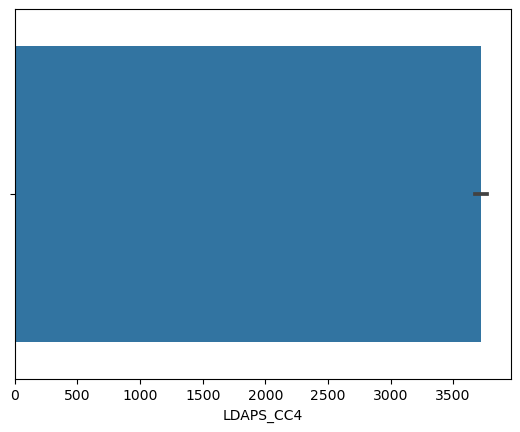

In [60]:
sns.barplot(tempds['LDAPS_CC4'])
print(tempds['LDAPS_CC4'].value_counts())

0       4844
2812      75
144       11
193        5
123        3
        ... 
1387       1
1432       1
1431       1
1395       1
2146       1
Name: LDAPS_PPT1, Length: 2813, dtype: int64


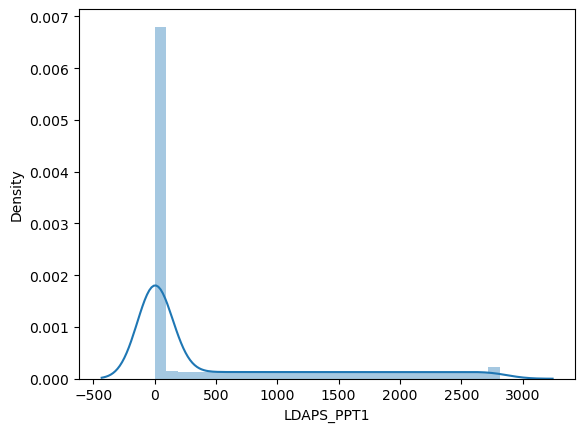

In [61]:
sns.distplot(tempds['LDAPS_PPT1'])
print(tempds['LDAPS_PPT1'].value_counts())

0       5151
2510      75
150        7
7          3
86         3
        ... 
517        1
603        1
271        1
465        1
1273       1
Name: LDAPS_PPT2, Length: 2511, dtype: int64


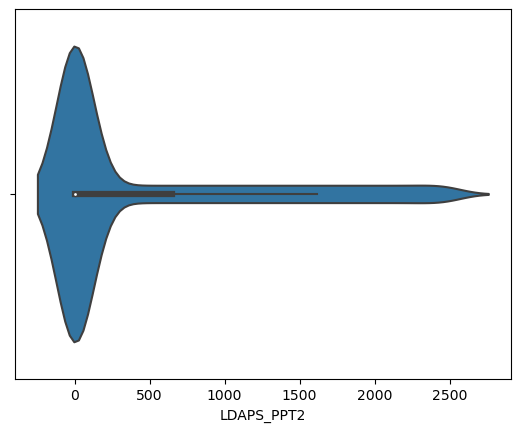

In [62]:
sns.violinplot(tempds['LDAPS_PPT2'])
print(tempds['LDAPS_PPT2'].value_counts())

0       5294
2356      75
157       10
82         4
209        3
        ... 
487        1
350        1
1171       1
412        1
673        1
Name: LDAPS_PPT3, Length: 2357, dtype: int64


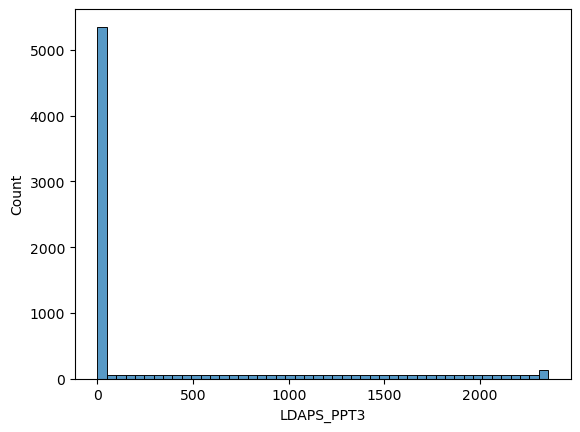

In [63]:
sns.histplot(tempds['LDAPS_PPT3'])
print(tempds['LDAPS_PPT3'].value_counts())

0       5751
1918      75
130        3
1917       2
82         2
        ... 
1851       1
1763       1
1838       1
1807       1
1725       1
Name: LDAPS_PPT4, Length: 1919, dtype: int64


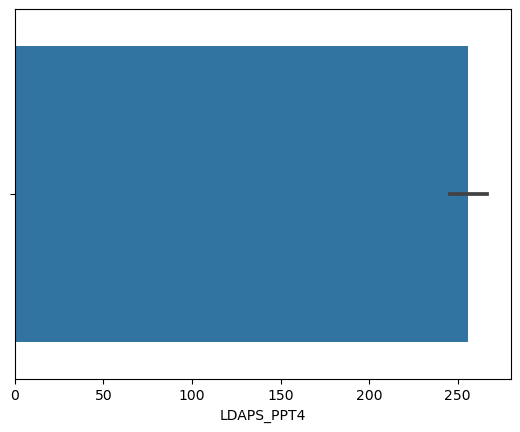

In [64]:
sns.barplot(tempds['LDAPS_PPT4'])
print(tempds['LDAPS_PPT4'].value_counts())

8     1240
7     1240
9      620
4      620
1      620
3      620
6      620
10     620
5      620
11     311
0      311
2      310
Name: lat, dtype: int64


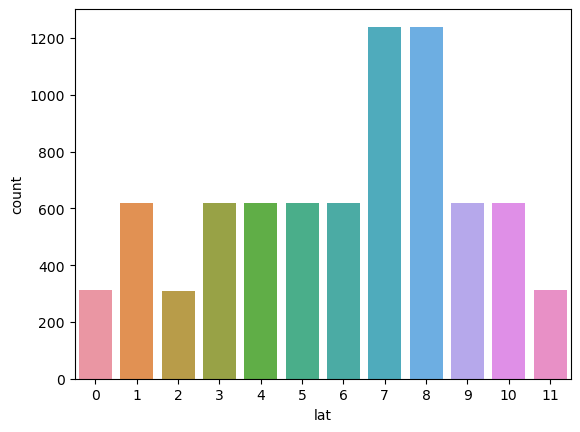

In [65]:
sns.countplot(tempds['lat'])
print(tempds['lat'].value_counts())

In the above plot we can see that lat is high at point 7 and 8.

24    311
0     311
11    310
6     310
3     310
2     310
22    310
17    310
13    310
7     310
15    310
23    310
12    310
20    310
5     310
16    310
10    310
21    310
8     310
4     310
1     310
18    310
14    310
19    310
9     310
Name: lon, dtype: int64


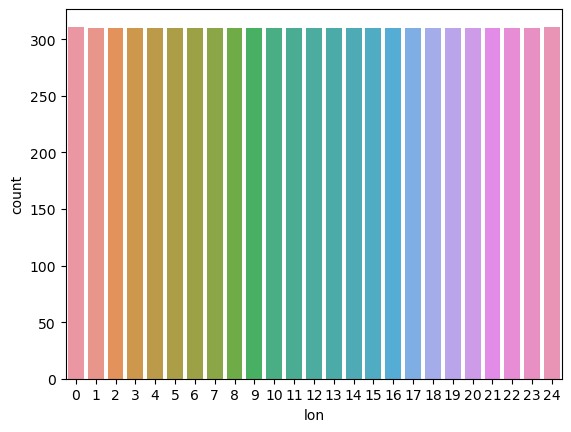

In [66]:
sns.countplot(tempds['lon'])
print(tempds['lon'].value_counts())

In the lon plot data is equal value for all the plot.

24    311
0     311
8     310
2     310
1     310
4     310
5     310
22    310
19    310
17    310
15    310
20    310
7     310
18    310
11    310
21    310
6     310
23    310
13    310
14    310
16    310
10    310
12    310
9     310
3     310
Name: DEM, dtype: int64


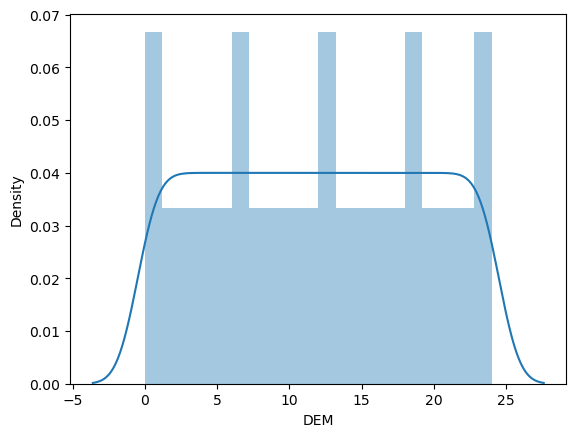

In [67]:
sns.distplot(tempds['DEM'])
print(tempds['DEM'].value_counts())

23    310
10    310
7     310
5     310
4     310
2     310
11    310
24    310
19    310
17    310
15    310
20    310
16    310
13    310
22    310
12    310
14    310
25    310
8     310
18    310
1     310
3     310
9     310
21    310
6     310
0       1
26      1
Name: Slope, dtype: int64


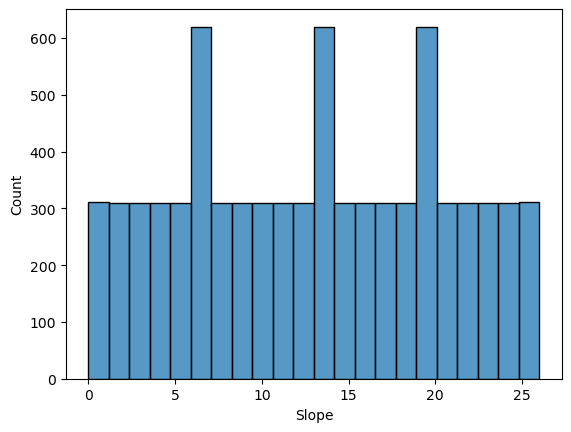

In [68]:
sns.histplot(tempds['Slope'])
print(tempds['Slope'].value_counts())

1574    5
511     5
507     5
539     5
523     5
       ..
13      1
18      1
20      1
109     1
14      1
Name: Solar radiation, Length: 1575, dtype: int64


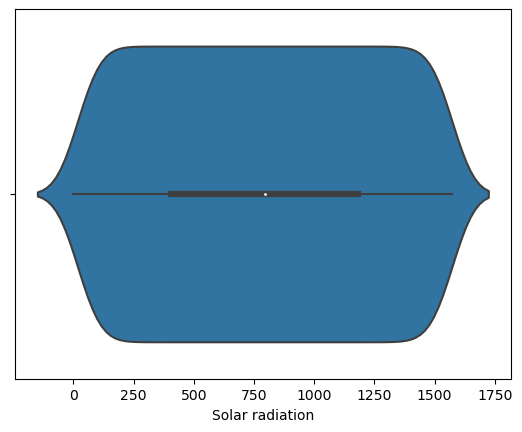

In [69]:
sns.violinplot(tempds['Solar radiation'])
print(tempds['Solar radiation'].value_counts())

94     113
131    106
114    104
97     101
113     98
      ... 
176      1
181      1
175      1
12       1
19       1
Name: Next_Tmax, Length: 184, dtype: int64


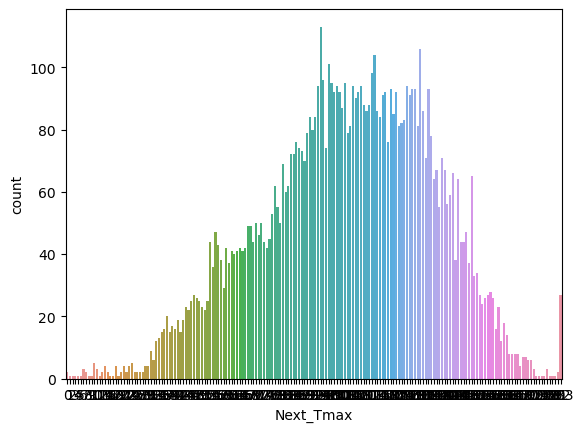

In [70]:
sns.countplot(tempds['Next_Tmax'])
print(tempds['Next_Tmax'].value_counts())

98     159
97     157
103    156
95     150
101    149
      ... 
145      1
12       1
155      1
3        1
1        1
Name: Next_Tmin, Length: 158, dtype: int64


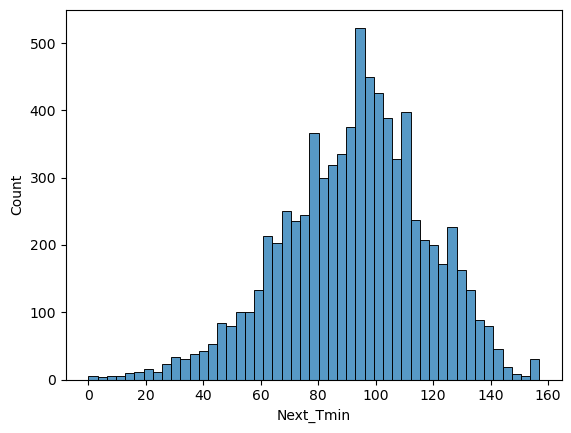

In [71]:
sns.histplot(tempds['Next_Tmin'])
print(tempds['Next_Tmin'].value_counts())

2. Univariate Analysis

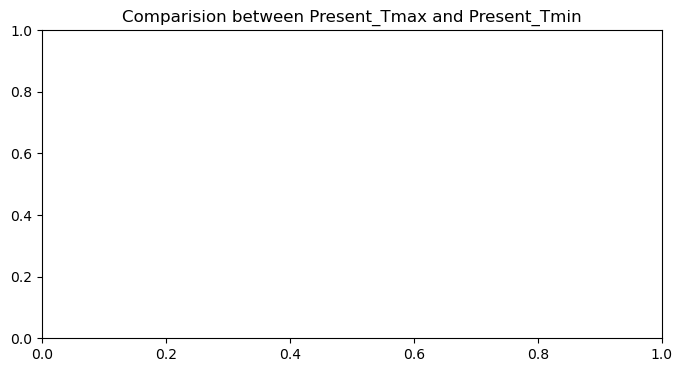

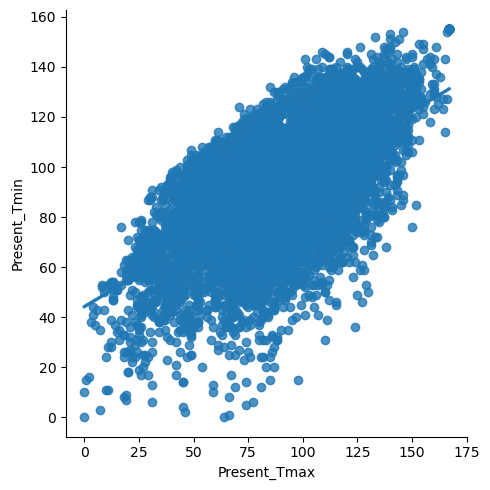

In [72]:
# Comparision between Present_Tmax and Present_Tmin

plt.figure(figsize=(8,4))
plt.title('Comparision between Present_Tmax and Present_Tmin')
sns.lmplot(x='Present_Tmax',y='Present_Tmin' ,data=tempds ,palette='spring')
plt.show()

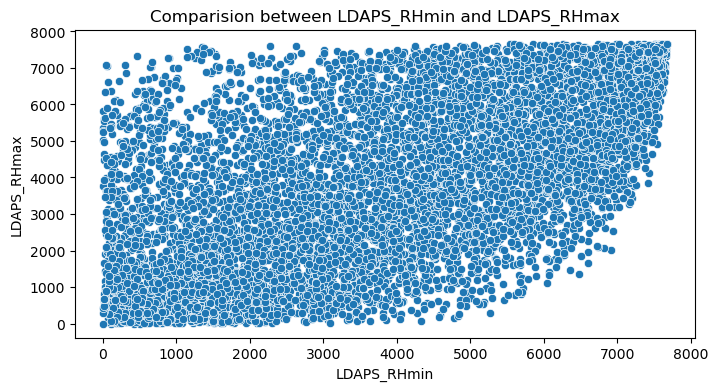

In [73]:
# Comparision between LDAPS_RHmin and LDAPS_RHmax

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_RHmin and LDAPS_RHmax')
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_RHmax' ,data=tempds ,palette='icefire')
plt.show()

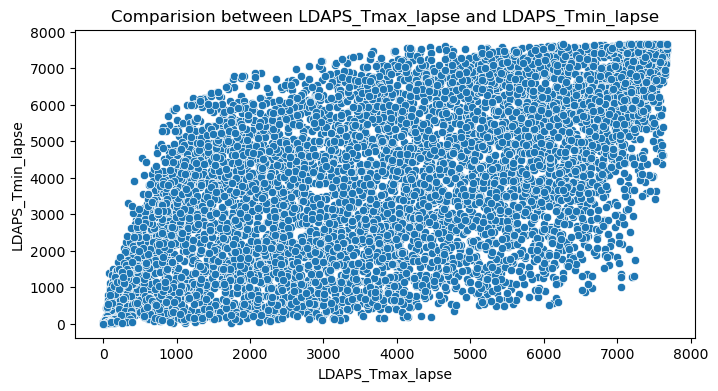

In [69]:
# Comparision between LDAPS_Tmax_lapse and LDAPS_Tmin_lapse

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_Tmax_lapse and LDAPS_Tmin_lapse')
sns.scatterplot(x='LDAPS_Tmax_lapse',y='LDAPS_Tmin_lapse' ,data=tempds ,palette='cividis')
plt.show()

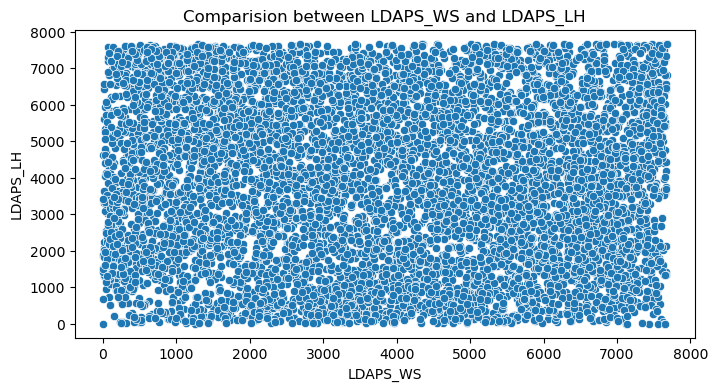

In [71]:
# Comparision between LDAPS_WS and LDAPS_LH

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_WS and LDAPS_LH')
sns.scatterplot(x='LDAPS_WS',y='LDAPS_LH' ,data=tempds ,palette='bright')
plt.show()

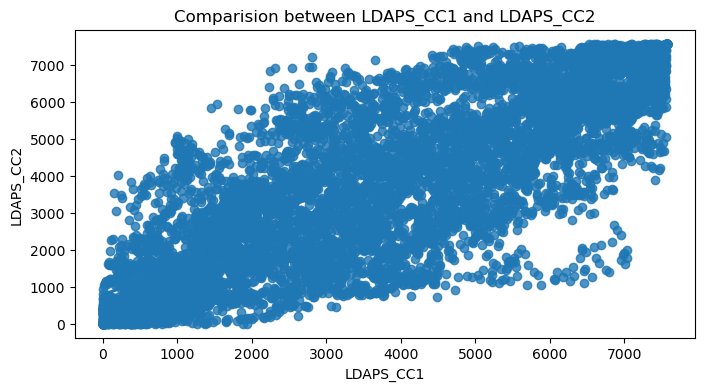

In [87]:
# Comparision between LDAPS_CC1 and LDAPS_CC2

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_CC1 and LDAPS_CC2')
sns.regplot(x='LDAPS_CC1',y='LDAPS_CC2' ,data=tempds)
plt.show()

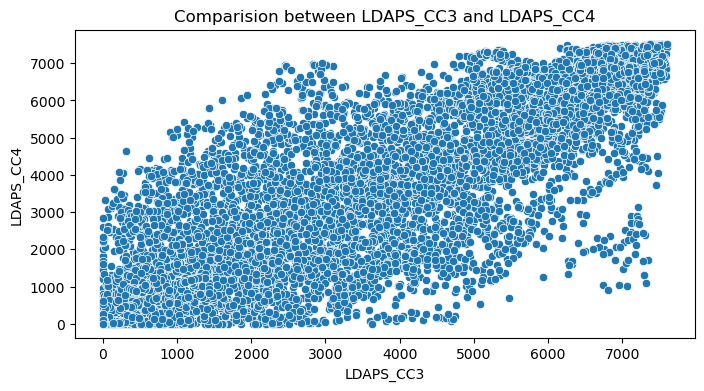

In [74]:
# Comparision between LDAPS_CC3 and LDAPS_CC4

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_CC3 and LDAPS_CC4')
sns.scatterplot(x='LDAPS_CC3',y='LDAPS_CC4' ,data=tempds ,palette='crest')
plt.show()

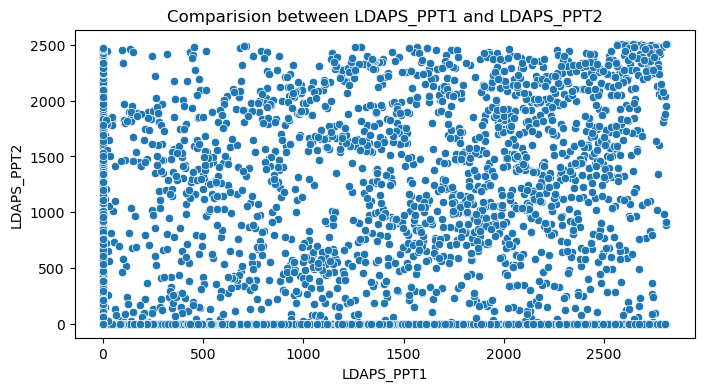

In [81]:
# Comparision between LDAPS_PPT1 and LDAPS_PPT2

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_PPT1 and LDAPS_PPT2')
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_PPT2' ,data=tempds )
plt.show()

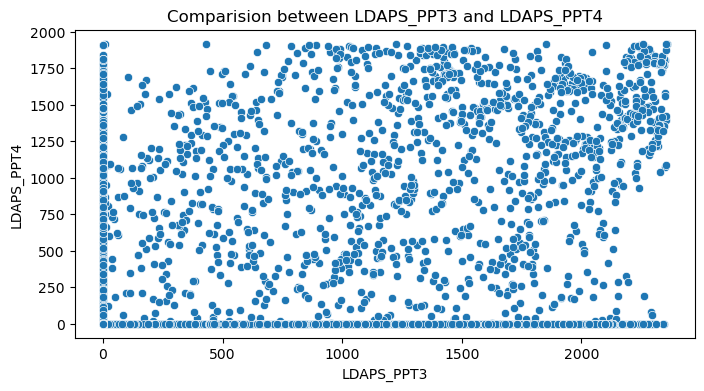

In [82]:
# Comparision between LDAPS_PPT3 and LDAPS_PPT4

plt.figure(figsize=(8,4))
plt.title('Comparision between LDAPS_PPT3 and LDAPS_PPT4')
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_PPT4' ,data=tempds )
plt.show()

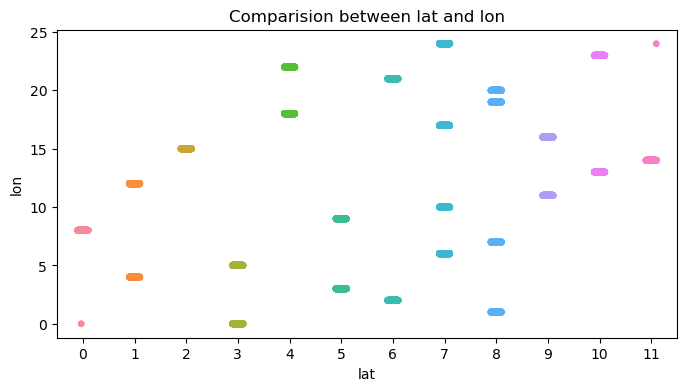

In [84]:
# Comparision between lat and lon

plt.figure(figsize=(8,4))
plt.title('Comparision between lat and lon')
sns.stripplot(x='lat',y='lon' ,data=tempds )
plt.show()

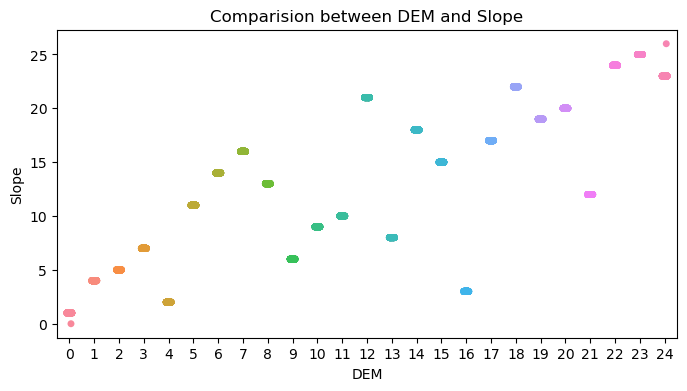

In [89]:
# Comparision between DEM and Slope

plt.figure(figsize=(8,4))
plt.title('Comparision between DEM and Slope')
sns.stripplot(x='DEM',y='Slope' ,data=tempds )
plt.show()

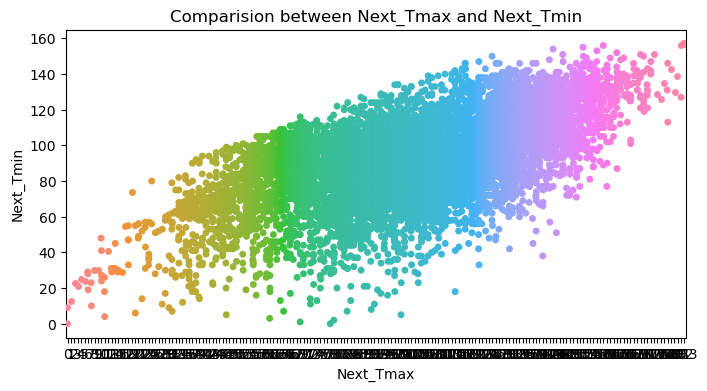

In [90]:
# Comparision between Next_Tmax and Next_Tmin

plt.figure(figsize=(8,4))
plt.title('Comparision between Next_Tmax and Next_Tmin')
sns.stripplot(x='Next_Tmax',y='Next_Tmin' ,data=tempds )
plt.show()

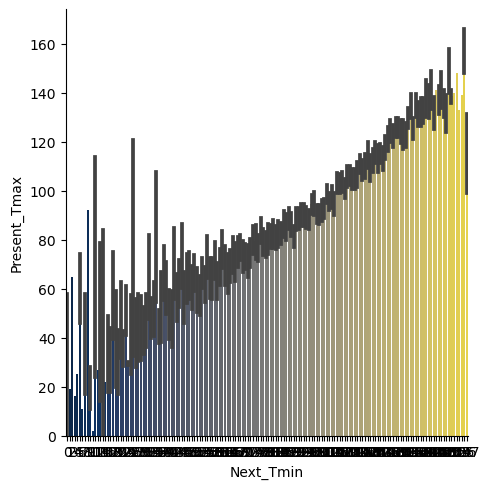

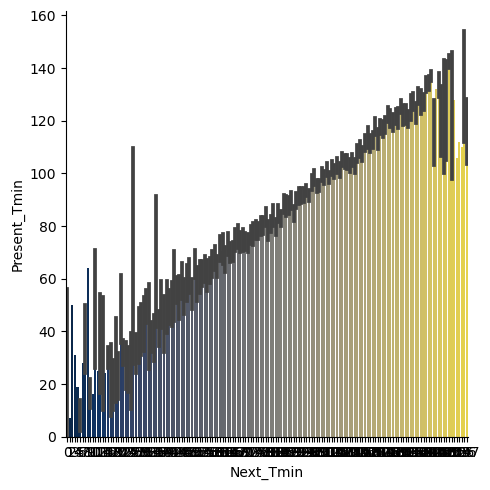

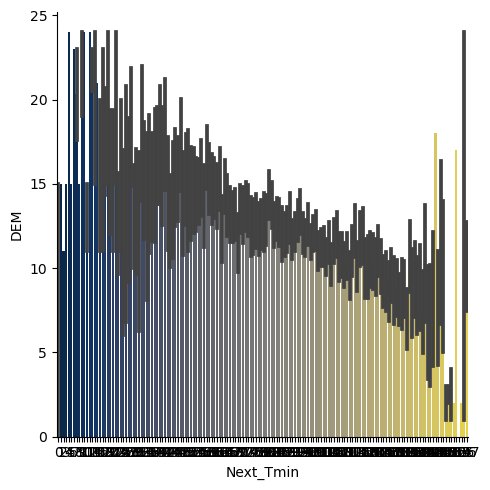

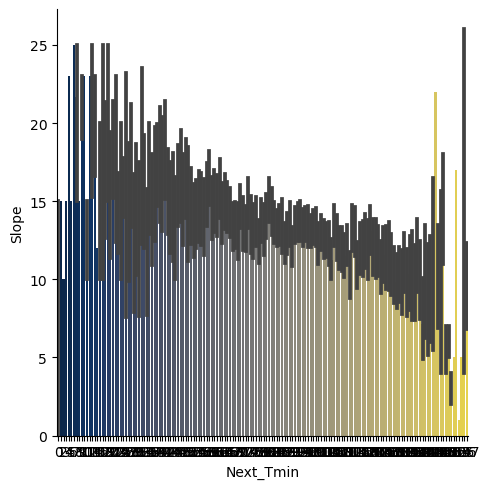

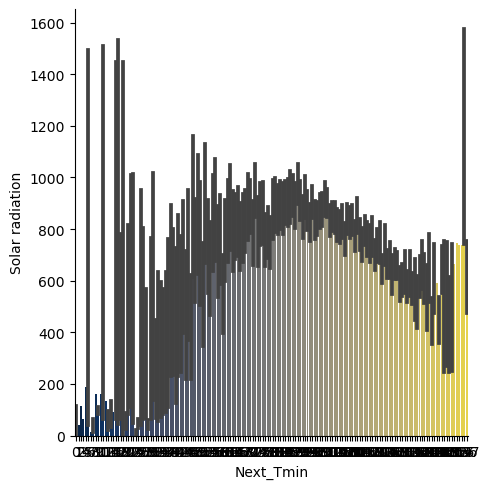

In [94]:
# Checking Next_Tmin with Present_Tmax
sns.catplot(x='Next_Tmin' , y='Present_Tmax' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmin with Present_Tmin
sns.catplot(x='Next_Tmin' , y='Present_Tmin' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmin with DEM
sns.catplot(x='Next_Tmin' , y='DEM' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmin with Slope
sns.catplot(x='Next_Tmin' , y='Slope' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmin with Solar radiation
sns.catplot(x='Next_Tmin' , y='Solar radiation' , data=tempds , palette='cividis' , kind='bar')

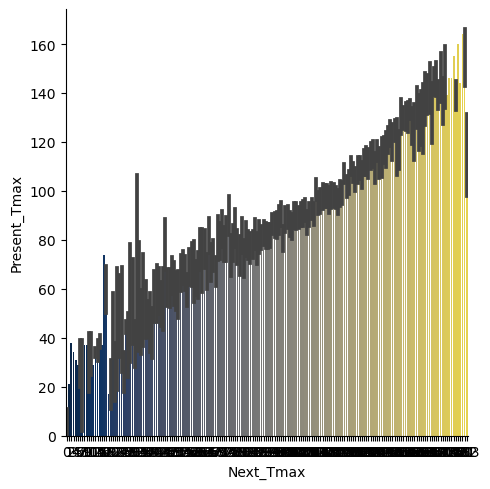

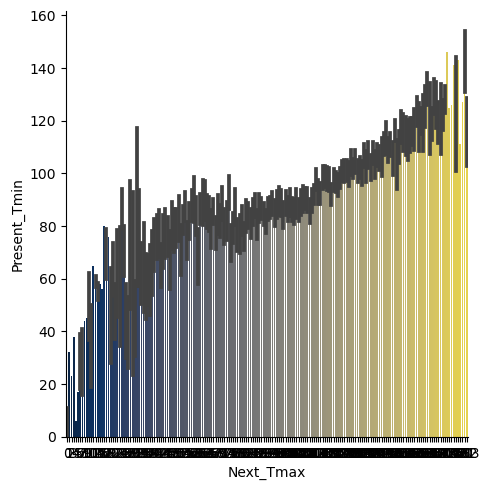

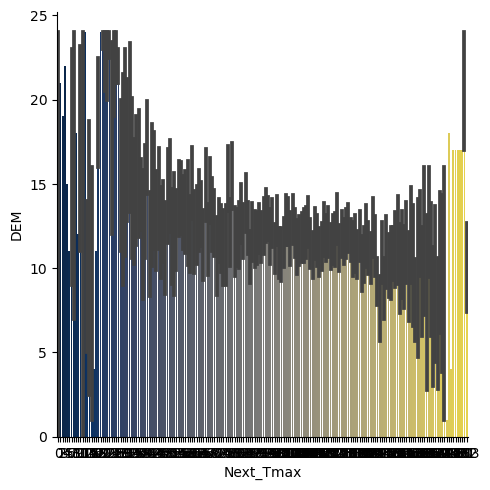

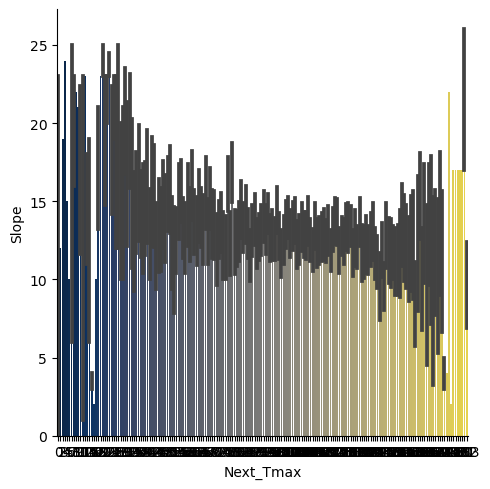

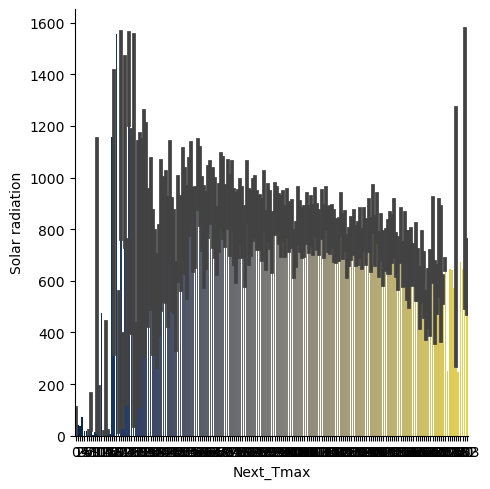

In [95]:
# Checking Next_Tmax with Present_Tmax
sns.catplot(x='Next_Tmax' , y='Present_Tmax' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmax with Present_Tmin
sns.catplot(x='Next_Tmax' , y='Present_Tmin' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmax with DEM
sns.catplot(x='Next_Tmax' , y='DEM' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmax with Slope
sns.catplot(x='Next_Tmax' , y='Slope' , data=tempds , palette='cividis' , kind='bar')

# Checking Next_Tmax with Solar radiation
sns.catplot(x='Next_Tmax' , y='Solar radiation' , data=tempds , palette='cividis' , kind='bar')

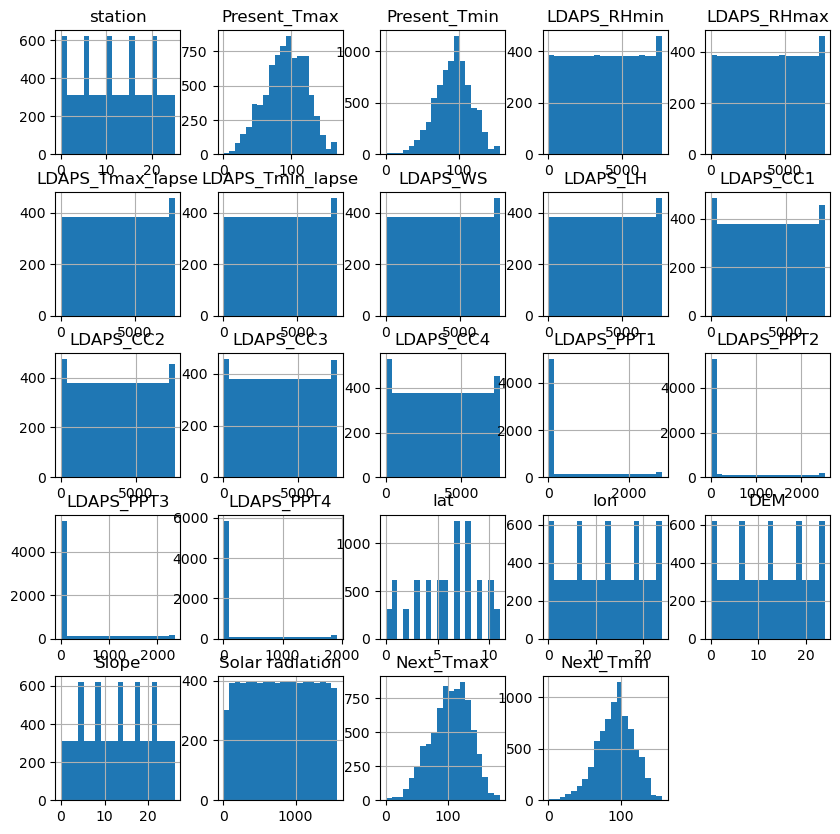

In [47]:
tempds.hist(bins=20, figsize=(10,10))
plt.show()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

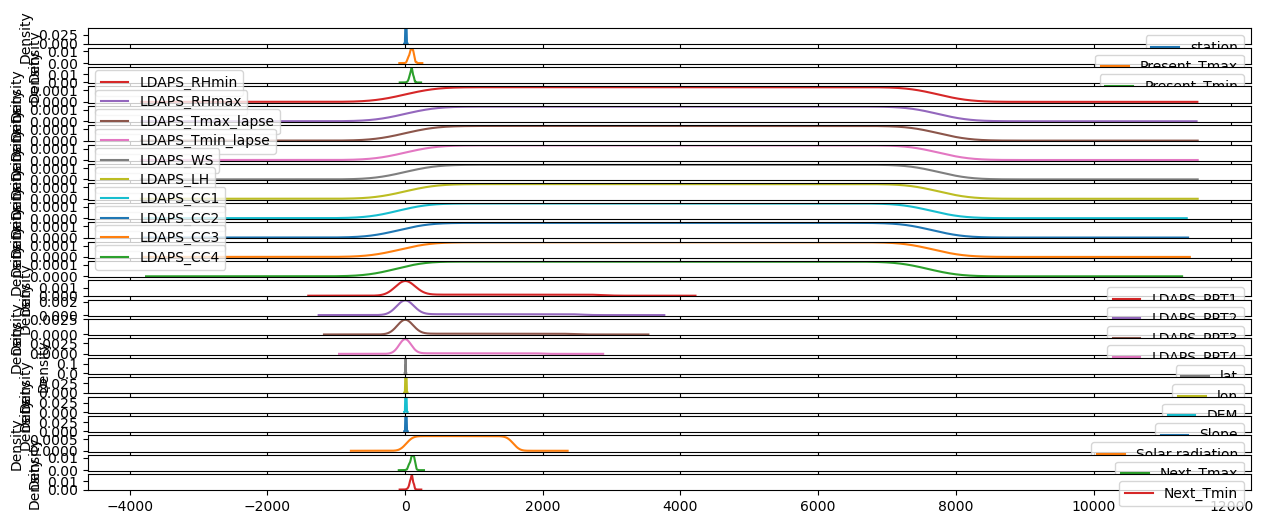

In [48]:
tempds.plot(kind='kde' , subplots=True , figsize=(15,6))

# Checking Skewness

In [49]:
tempds.skew()

station             0.000115
Present_Tmax       -0.163930
Present_Tmin       -0.232307
LDAPS_RHmin        -0.001296
LDAPS_RHmax        -0.001909
LDAPS_Tmax_lapse   -0.000949
LDAPS_Tmin_lapse   -0.000949
LDAPS_WS           -0.000949
LDAPS_LH           -0.000949
LDAPS_CC1           0.000944
LDAPS_CC2           0.000523
LDAPS_CC3           0.000079
LDAPS_CC4           0.003226
LDAPS_PPT1          1.367226
LDAPS_PPT2          1.535114
LDAPS_PPT3          1.629611
LDAPS_PPT4          1.943167
lat                -0.343742
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000236
Next_Tmax          -0.285955
Next_Tmin          -0.339388
dtype: float64

In [50]:
tempds['LDAPS_PPT1'] = np.cbrt(tempds['LDAPS_PPT1'])

In [51]:
tempds['LDAPS_PPT2'] = np.cbrt(tempds['LDAPS_PPT2'])

In [52]:
tempds['LDAPS_PPT3'] = np.cbrt(tempds['LDAPS_PPT3'])

In [53]:
tempds['LDAPS_PPT4'] = np.cbrt(tempds['LDAPS_PPT4'])

In [54]:
tempds.skew()

station             0.000115
Present_Tmax       -0.163930
Present_Tmin       -0.232307
LDAPS_RHmin        -0.001296
LDAPS_RHmax        -0.001909
LDAPS_Tmax_lapse   -0.000949
LDAPS_Tmin_lapse   -0.000949
LDAPS_WS           -0.000949
LDAPS_LH           -0.000949
LDAPS_CC1           0.000944
LDAPS_CC2           0.000523
LDAPS_CC3           0.000079
LDAPS_CC4           0.003226
LDAPS_PPT1          0.761957
LDAPS_PPT2          0.935175
LDAPS_PPT3          1.026795
LDAPS_PPT4          1.336002
lat                -0.343742
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000236
Next_Tmax          -0.285955
Next_Tmin          -0.339388
dtype: float64

now we see that skewness is almost removed.

# Checking Outliers

<Figure size 800x200 with 0 Axes>

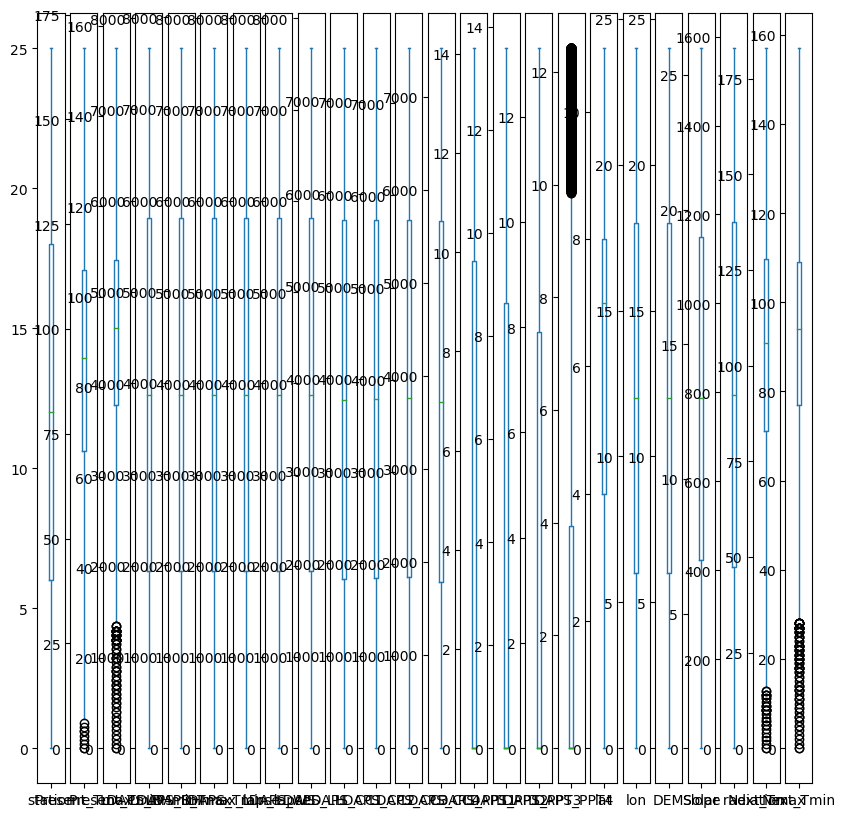

In [55]:
plt.figure(figsize=(8,2))
tempds.plot(kind='box' ,subplots=True  ,figsize=(10,10))
plt.show()

as per above we can see that there is outlier present in the dataset and we need to remove it.

In [56]:
# Removing outliers

from scipy.stats import zscore

In [57]:
z = np.abs(zscore(tempds))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30 00:00:00,1.664083,0.374095,0.761881,0.255673,0.255024,0.712116,0.449732,0.202875,0.421901,0.458371,...,0.676477,0.648814,0.564705,1.013151,0.138643,1.663721,1.386348,1.739582,0.382242,0.700563
2013-06-30 00:00:00,1.525448,0.678244,0.680984,0.275110,0.139072,0.049110,0.158176,0.863199,0.235177,0.503543,...,0.676477,0.648814,0.564705,1.013151,0.554574,0.138643,0.415904,1.643617,0.062235,0.181884
2013-06-30 00:00:00,1.386813,0.579587,0.006637,0.626580,0.905395,0.164881,0.509064,0.409950,1.404058,0.596122,...,0.676477,0.648814,0.564705,0.679891,0.970504,0.415930,0.970444,1.612373,0.252725,0.376693
2013-06-30 00:00:00,1.248178,0.711130,0.047085,0.253885,1.375599,0.015704,0.271383,0.896277,0.310153,0.552292,...,0.676477,0.648814,0.564705,1.679672,0.277287,0.000000,1.109079,1.574433,0.443216,0.536286
2013-06-30 00:00:00,1.109544,0.513816,0.559639,0.077702,0.054906,0.277641,0.182879,0.821182,1.327952,0.852393,...,0.676477,0.648814,0.564705,0.346630,1.663721,0.277287,0.554539,1.596750,0.284474,0.181884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30 00:00:00,1.385883,2.149917,2.501157,1.712294,1.330256,1.265938,1.611909,0.398775,0.498783,1.512527,...,0.676477,0.648814,0.564705,0.013370,1.386434,1.525078,1.247713,1.706225,0.636229,1.937413
2017-08-30 00:00:00,1.524518,2.149917,2.258467,1.725709,1.427853,1.087142,1.614144,0.020621,0.450626,1.475405,...,0.676477,0.648814,0.564705,0.319890,1.247791,1.386434,1.109079,1.715152,0.540984,1.658124
2017-08-30 00:00:00,1.663153,2.182803,2.379812,1.726603,1.432777,0.772460,1.628001,0.486714,1.713376,1.380589,...,0.676477,0.648814,0.564705,0.319890,0.415930,1.247791,0.831809,1.695067,0.794971,2.216701


In [58]:
print(np.where(z>3))

(array([3166, 3184, 3190, 3191, 3191, 3209, 3215, 3216, 3266, 3525, 4566,
       4591, 6066, 6076, 6084, 6090, 6091, 6101, 6109, 6115, 6116, 6125,
       6126, 6134, 6141, 6150, 6151, 6159, 6166, 6166, 6168, 6175, 6175,
       6175, 6176, 6176, 6177, 6178, 6179, 6184, 6186, 6186, 6187, 6189,
       6191, 6191, 6193, 6194, 7609, 7616, 7634, 7641, 7666, 7675, 7700,
       7700, 7700, 7701, 7709, 7711, 7715, 7716, 7718, 7719, 7725, 7725,
       7725, 7726, 7726, 7733, 7734, 7734, 7736, 7740, 7741, 7741, 7743,
       7750, 7750, 7750, 7750], dtype=int64), array([23, 23, 23,  2, 23,  2,  2,  2,  2,  2, 23,  2, 23, 23, 23, 23, 23,
        2,  2,  2,  2,  2, 23, 23, 23, 23,  2,  2,  2, 23,  2,  2, 22, 23,
        2, 22, 22, 22, 22, 22, 22, 23, 22, 22,  2, 22, 22, 22, 23, 23,  2,
        2,  2, 23,  2, 22, 23, 23, 23, 23, 23, 23, 23, 23,  1,  2, 23,  2,
       23,  2,  2, 23,  2,  2,  2, 23,  2,  1,  2, 22, 23], dtype=int64))


In [59]:
tempds_new = tempds[(z<3).all(axis=1)]
tempds_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30 00:00:00,0,80,73,4445,4440,2281,2868,4328,4818,2744,...,0.000000,0.000000,0.000000,9,11,24,23,1574,92,75
2013-06-30 00:00:00,1,112,75,3258,4181,3984,4228,1943,3348,2643,...,0.000000,0.000000,0.000000,9,16,11,10,1531,106,88
2013-06-30 00:00:00,2,109,92,2472,1848,4243,5013,2957,733,2436,...,0.000000,0.000000,0.000000,8,19,9,6,1517,112,102
2013-06-30 00:00:00,3,113,93,4441,6943,3839,3267,1869,4568,2534,...,0.000000,0.000000,0.000000,11,14,12,21,1500,118,106
2013-06-30 00:00:00,4,107,78,4047,3993,3253,3465,2037,6845,1863,...,0.000000,0.000000,0.000000,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30 00:00:00,21,18,33,118,1791,1241,166,2113,5624,921,...,0.000000,0.000000,0.000000,4,22,4,2,29,81,34
2017-08-30 00:00:00,22,26,30,44,899,1042,268,2982,4990,387,...,0.000000,0.000000,0.000000,6,2,1,4,30,84,44
2017-08-30 00:00:00,23,26,36,14,681,1442,263,3828,2866,470,...,0.000000,0.000000,0.000000,5,3,2,5,26,87,51


In [60]:
tempds_new.shape

(7688, 24)

In [61]:
tempds.shape

(7752, 24)

now we see that outlier is removed .

In [62]:
tempds = tempds_new

# Lets Check Correlation

In [63]:
tempds.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.102268,0.123286,-0.062816,-0.169324,0.062803,0.104172,0.022016,-0.125052,0.010013,...,-0.011938,-0.025947,-0.002770,-0.184229,-0.152408,-0.295648,-0.117923,-0.025444,0.101184,0.124589
Present_Tmax,0.102268,1.000000,0.632639,-0.186555,-0.321674,0.525788,0.592861,-0.099476,0.132899,-0.286759,...,-0.135893,-0.098252,-0.085466,-0.039997,0.014190,-0.123247,-0.100562,-0.097939,0.580024,0.595007
Present_Tmin,0.123286,0.632639,1.000000,0.139457,-0.030144,0.423787,0.731219,0.022827,0.014494,0.113147,...,0.117004,0.024788,-0.053277,-0.055314,-0.034026,-0.217378,-0.163699,-0.070851,0.437580,0.759657
LDAPS_RHmin,-0.062816,-0.186555,0.139457,1.000000,0.605771,-0.542862,0.102423,0.254236,0.012856,0.618285,...,0.586048,0.498578,0.337665,0.051461,-0.072618,0.069108,0.067649,0.195770,-0.406572,0.109414
LDAPS_RHmax,-0.169324,-0.321674,-0.030144,0.605771,1.000000,-0.384703,-0.162205,0.158300,0.263665,0.468364,...,0.470792,0.327675,0.203203,0.174798,0.024845,0.177006,0.181577,0.148696,-0.309301,-0.101483
LDAPS_Tmax_lapse,0.062803,0.525788,0.423787,-0.542862,-0.384703,1.000000,0.613781,-0.200330,0.068140,-0.392576,...,-0.393424,-0.311318,-0.226289,-0.014780,0.094831,-0.114436,-0.094769,-0.074146,0.801205,0.548853
LDAPS_Tmin_lapse,0.104172,0.592861,0.731219,0.102423,-0.162205,0.613781,1.000000,-0.008519,-0.096056,0.062106,...,0.028544,-0.022992,-0.092381,-0.067353,-0.025365,-0.178330,-0.157649,-0.036049,0.564027,0.853054
LDAPS_WS,0.022016,-0.099476,0.022827,0.254236,0.158300,-0.200330,-0.008519,1.000000,-0.023034,0.272148,...,0.268630,0.176767,0.228883,0.005871,-0.085299,0.105253,0.111391,0.179373,-0.257712,-0.017856
LDAPS_LH,-0.125052,0.132899,0.014494,0.012856,0.263665,0.068140,-0.096056,-0.023034,1.000000,-0.100164,...,-0.057160,0.012141,0.052884,0.045714,0.060139,0.081297,0.012977,-0.061304,0.166015,-0.033813
LDAPS_CC1,0.010013,-0.286759,0.113147,0.618285,0.468364,-0.392576,0.062106,0.272148,-0.100164,1.000000,...,0.643525,0.370225,0.281508,-0.012008,-0.009895,-0.015974,-0.019037,0.183965,-0.403303,0.032204


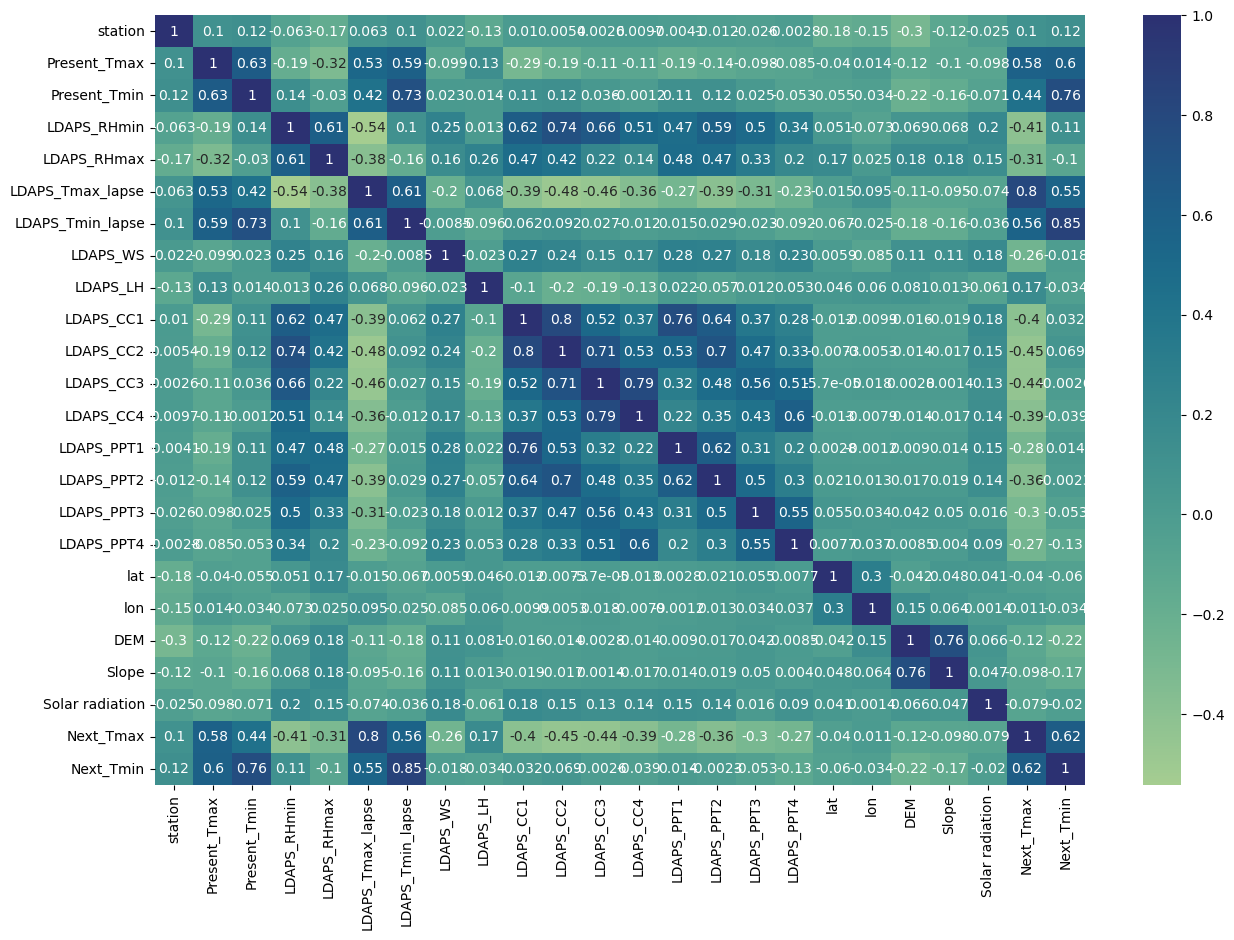

In [64]:
# checking heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(tempds.corr() , cmap='crest' , annot=True)
plt.show()

As per above heatmap we can see that there is multicollinearity is present and we need to remove it.

# Taking 'Next_Tmax' maximum temperature for next day  -- for prediction.

In [65]:
# Assigning x and y value

x1 = tempds.drop('Next_Tmax',axis=1)
y = tempds['Next_Tmax']

In [66]:
x1.shape

(7688, 23)

In [70]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

x1.shape[1]

23

# Use of VIF for multicollinearity

In [73]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
def vif_cal(x1):
    vif = pd.DataFrame()
    vif['Variables'] = x1.columns
    vif['VIF factor'] = [variance_inflation_factor(x1.values , i) for i in range(x1.shape[1])]
    return(vif)

vif_cal(x1)

,Variables,VIF factor
0,station,4.215752
1,Present_Tmax,27.908033
2,Present_Tmin,49.420485
3,LDAPS_RHmin,23.408883
4,LDAPS_RHmax,10.642213
5,LDAPS_Tmax_lapse,19.788662
6,LDAPS_Tmin_lapse,20.669192
7,LDAPS_WS,4.797750
8,LDAPS_LH,5.814596
9,LDAPS_CC1,20.652746


# Use of PCA method

here we are using PCA method to remove the multicollinearity .

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components = 15)
x1 = pca.fit_transform(x1)
x1.shape

(7688, 15)

now we see that number of columns is reduces and multicollinearity is removed .

In [77]:
x = x1

# Performing train_test_split method

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x1_train ,x1_test , y1_train ,y1_test = train_test_split(x,y,test_size=.30 , random_state=45)

In [82]:
x1_train.shape

(5381, 15)

In [83]:
x1_test.shape

(2307, 15)

In [84]:
y1_train.shape

(5381,)

In [85]:
y1_test.shape

(2307,)

# Applying Models

In [86]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error , accuracy_score
from sklearn.model_selection import cross_val_score

In [87]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor , AdaBoostRegressor 
from sklearn.svm import SVR

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier , AdaBoostClassifier 
from sklearn.svm import SVC

In [89]:
models =[LinearRegression(),Lasso(alpha=0.1),Ridge(alpha=0.1),LogisticRegression(),DecisionTreeRegressor(),
         KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
         SVR() ,DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier() ,SVC()]

for m in models:
    m.fit(x1_train , y1_train)
    pred_m = m.predict(x1_test)
    print(m)
    print('r2 score:',r2_score(y1_test,pred_m))
    print('mean squared error:',mean_squared_error(y1_test,pred_m))
    print('mean absolute error:',mean_absolute_error(y1_test,pred_m))
    print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_m)))
    print('\n')

LinearRegression()
r2 score: 0.7500326023742335
mean squared error: 233.68178948451944
mean absolute error: 11.691665357684148
squared root error: 15.286653966271345


Lasso(alpha=0.1)
r2 score: 0.7500260750478666
mean squared error: 233.6878915495105
mean absolute error: 11.691293498099284
squared root error: 15.286853552955575


Ridge(alpha=0.1)
r2 score: 0.7500326029261463
mean squared error: 233.68178896856426
mean absolute error: 11.691665293993927
squared root error: 15.286653949395344


LogisticRegression()
r2 score: 0.41193866665931445
mean squared error: 549.7485912440399
mean absolute error: 16.958820979627223
squared root error: 23.446718133761063


DecisionTreeRegressor()
r2 score: 0.688573749547858
mean squared error: 291.1365409622887
mean absolute error: 12.117035110533159
squared root error: 17.062723726365867


KNeighborsRegressor()
r2 score: 0.8348716987820746
mean squared error: 154.3700390117035
mean absolute error: 8.726137841352404
squared root error: 12.424573997

# Cross Validation Score

In [90]:
models =[LinearRegression(),Lasso(),Ridge(),LogisticRegression(),DecisionTreeRegressor(),
         KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
         SVR() ,DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier() ,SVC()]

for i in models:
    score = cross_val_score(i,x,y,cv=4)
    print(i)
    print('score:',score)
    print('score mean:',score.mean())
    print('score std:',score.std())
    print('Differnce between r2 score and mean:',(r2_score(y1_test,pred_m)-score.mean())*100)
    print('Differnce betweem accuracy score and mean ',accuracy_score(y1_test,pred_m)-score.mean())
    print('\n')


LinearRegression()
score: [0.68738613 0.66871143 0.73756063 0.7400582 ]
score mean: 0.7084290962742902
score std: 0.031102035467893575
Differnce between r2 score and mean: -4.97965047914668
Differnce betweem accuracy score and mean  -0.6845886107953132


Lasso()
score: [0.68834576 0.66848464 0.73740173 0.73964748]
score mean: 0.7084698997546588
score std: 0.030874317757082465
Differnce between r2 score and mean: -4.983730827183541
Differnce betweem accuracy score and mean  -0.6846294142756818


Ridge()
score: [0.68738622 0.66871142 0.73756064 0.74005815]
score mean: 0.7084291076659441
score std: 0.031102012188873512
Differnce between r2 score and mean: -4.979651618312076
Differnce betweem accuracy score and mean  -0.6845886221869671


LogisticRegression()
score: [0.01977107 0.01664932 0.01404787 0.01404787]
score mean: 0.016129032258064516
score std: 0.0023557193387454254
Differnce between r2 score and mean: 64.25035592247589
Differnce betweem accuracy score and mean  0.007711453220912

as per above result GradientBoostingRegressor has the lowest value and it will be used for futher prediction.

# Finalizing the Model

In [154]:
final_gbr = GradientBoostingRegressor()
final_gbr.fit(x1_train,y1_train)
pred_gbr = final_gbr.predict(x1_test)
print(pred_gbr)

[ 93.81846118  45.11377534 108.17135394 ... 105.56056787  88.38876581
 106.32317906]


# Saving Best Model

In [155]:
# Saving best model

import joblib
joblib.dump(final_gbr,'temp_max.pkl')

['temp_max.pkl']

In [156]:
# predicting the saved model
model = joblib.load('temp_max.pkl')

# Prediction
prediction = model.predict(x1_test)
prediction

array([ 93.81846118,  45.11377534, 108.17135394, ..., 105.56056787,
        88.38876581, 106.32317906])

# Checking the Predicted model 

In [157]:
a = np.array(y1_test)
temp = pd.DataFrame()
temp['predicted'] = prediction
temp['original'] = a

temp

,predicted,original
0,93.818461,94
1,45.113775,44
2,108.171354,98
3,99.309910,85
4,93.083686,87
...,...,...
2302,133.102706,126
2303,91.757935,95
2304,105.560568,112
2305,88.388766,108


# Hyper parameters Tunnings

In [91]:
from sklearn.model_selection import GridSearchCV

parameters = {'loss':['squared_error','absolute_error'],'n_estimators':[10,50,100],
              'criterion':['friedman_mse', 'squared_error'],
              'random_state':[10,50,100]
             }

In [92]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters,cv=2)
grid.fit(x1_train,y1_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [10, 50, 100],
                         'random_state': [10, 50, 100]})

In [93]:
grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'n_estimators': 100,
 'random_state': 10}

In [94]:
Final =GradientBoostingRegressor(criterion='friedman_mse', loss= 'squared_error', n_estimators= 100, random_state=10)
Final.fit(x1_train,y1_train)
pred = Final.predict(x1_test)
print(pred)

[ 93.81846118  45.11377534 108.17135394 ... 105.56056787  88.38876581
 106.32317906]


In [95]:
# Saving the model

import pickle
maxtemp ='tem_max.pkl'
pickle.dump(Final,open(maxtemp,'wb')) # model saved

In [96]:
# loading saved model

loaded_mod = pickle.load(open('tem_max.pkl','rb'))
results = loaded_mod.score(x1_test,y1_test)
print(results*100)

80.50412312211968


In [97]:
conclusion = pd.DataFrame([loaded_mod.predict(x1_test)[:],y1_test[:]], index =['Predict','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2297,2298,2299,2300,2301,2302,2303,2304,2305,2306
Predict,93.818461,45.113775,108.171354,99.30991,93.083686,48.323605,126.927857,61.468385,44.683896,106.995243,...,138.112839,94.4299,138.962782,159.130486,111.785048,133.102706,91.757935,105.560568,88.388766,106.323179
Original,94.000000,44.000000,98.000000,85.00000,87.000000,34.000000,126.000000,70.000000,35.000000,119.000000,...,141.000000,105.0000,131.000000,166.000000,108.000000,126.000000,95.000000,112.000000,108.000000,130.000000


Here the prediction done for maximum temperature 

In [158]:
tempds

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30 00:00:00,0,80,73,4445,4440,2281,2868,4328,4818,2744,...,0.000000,0.000000,0.000000,9,11,24,23,1574,92,75
2013-06-30 00:00:00,1,112,75,3258,4181,3984,4228,1943,3348,2643,...,0.000000,0.000000,0.000000,9,16,11,10,1531,106,88
2013-06-30 00:00:00,2,109,92,2472,1848,4243,5013,2957,733,2436,...,0.000000,0.000000,0.000000,8,19,9,6,1517,112,102
2013-06-30 00:00:00,3,113,93,4441,6943,3839,3267,1869,4568,2534,...,0.000000,0.000000,0.000000,11,14,12,21,1500,118,106
2013-06-30 00:00:00,4,107,78,4047,3993,3253,3465,2037,6845,1863,...,0.000000,0.000000,0.000000,7,24,10,9,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30 00:00:00,21,18,33,118,1791,1241,166,2113,5624,921,...,0.000000,0.000000,0.000000,4,22,4,2,29,81,34
2017-08-30 00:00:00,22,26,30,44,899,1042,268,2982,4990,387,...,0.000000,0.000000,0.000000,6,2,1,4,30,84,44
2017-08-30 00:00:00,23,26,36,14,681,1442,263,3828,2866,470,...,0.000000,0.000000,0.000000,5,3,2,5,26,87,51


# Taking 'Next_Tmin' minimum temperature for next day  -- for prediction.

In [159]:
# Assigning x and y value

X = tempds.drop('Next_Tmin',axis=1)
Y= tempds['Next_Tmin']

In [160]:
X.shape

(7688, 23)

In [161]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

X.shape[1]

23

# Use of VIF for multicollinearity

In [163]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF factor'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
    return(vif)

vif_cal(X)

,Variables,VIF factor
0,station,4.352795
1,Present_Tmax,28.941414
2,Present_Tmin,43.123874
3,LDAPS_RHmin,23.109806
4,LDAPS_RHmax,10.581260
5,LDAPS_Tmax_lapse,25.258574
6,LDAPS_Tmin_lapse,18.537594
7,LDAPS_WS,4.792377
8,LDAPS_LH,5.982641
9,LDAPS_CC1,20.650526


# Use of PCA method

In [167]:
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
X.shape

(7688, 10)

now we see that number of columns is reduces and multicollinearity is removed .

# Performing Train test split method 

In [168]:
x2_train , x2_test , y2_train ,y2_test = train_test_split(x,y,test_size=.30 ,random_state=45)

In [169]:
x2_train.shape

(5381, 15)

In [170]:
x2_test.shape

(2307, 15)

In [171]:
y2_train.shape

(5381,)

In [172]:
y2_test.shape

(2307,)

# Applying Model

In [173]:
    model =[LinearRegression(),Lasso(),Ridge(),LogisticRegression(),DecisionTreeRegressor(),
             KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
             SVR() ,DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier() ,SVC()]


for m in model:
    m.fit(x2_train , y2_train)
    pred_m = m.predict(x2_test)
    print(m)
    print('r2 score:',r2_score(y2_test,pred_m))
    print('mean squared error:',mean_squared_error(y2_test,pred_m))
    print('mean absolute error:',mean_absolute_error(y2_test,pred_m))
    print('squared root error:',np.sqrt(mean_squared_error(y2_test,pred_m)))
    print('\n')

LinearRegression()
r2 score: 0.7500326023742332
mean squared error: 233.6817894845197
mean absolute error: 11.691665357684155
squared root error: 15.286653966271354


Lasso()
r2 score: 0.749942969286651
mean squared error: 233.7655828931888
mean absolute error: 11.688683645757386
squared root error: 15.289394458028376


Ridge()
r2 score: 0.7500326078932709
mean squared error: 233.68178432505252
mean absolute error: 11.691664720782919
squared root error: 15.28665379751411


LogisticRegression()
r2 score: 0.41193866665931445
mean squared error: 549.7485912440399
mean absolute error: 16.958820979627223
squared root error: 23.446718133761063


DecisionTreeRegressor()
r2 score: 0.6843496972981528
mean squared error: 295.085392284352
mean absolute error: 12.23927178153446
squared root error: 17.178049722956096


KNeighborsRegressor()
r2 score: 0.8348716987820746
mean squared error: 154.3700390117035
mean absolute error: 8.726137841352404
squared root error: 12.424573997192157


RandomForestR

# Cross Validation Score

In [206]:
model =[LinearRegression(),Lasso(),Ridge(),LogisticRegression(),DecisionTreeRegressor(),
         KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
         SVR() ]

for i in model:
    score = cross_val_score(i,x,y,cv=4)
    print(i)
    print('score:',score)
    print('score mean:',score.mean())
    print('score std:',score.std())
    print('Differnce between r2 score and mean:',(r2_score(y2_test,pred_m)-score.mean())*100)
    print('Differnce betweem accuracy score and mean ',accuracy_score(y2_test,pred_m)-score.mean())
    print('\n')


LinearRegression()
score: [0.68738613 0.66871143 0.73756063 0.7400582 ]
score mean: 0.70842909627429
score std: 0.03110203546789354
Differnce between r2 score and mean: -4.979650479146658
Differnce betweem accuracy score and mean  -0.684588610795313


Lasso()
score: [0.68834576 0.66848464 0.73740173 0.73964748]
score mean: 0.7084698997546586
score std: 0.030874317757082454
Differnce between r2 score and mean: -4.9837308271835195
Differnce betweem accuracy score and mean  -0.6846294142756816


Ridge()
score: [0.68738622 0.66871142 0.73756064 0.74005815]
score mean: 0.7084291076659441
score std: 0.031102012188873655
Differnce between r2 score and mean: -4.979651618312076
Differnce betweem accuracy score and mean  -0.6845886221869671


LogisticRegression()
score: [0.01977107 0.01664932 0.01404787 0.01404787]
score mean: 0.016129032258064516
score std: 0.0023557193387454254
Differnce between r2 score and mean: 64.25035592247589
Differnce betweem accuracy score and mean  0.00771145322091251

# Finalizing Model

In [187]:
final_gb = GradientBoostingRegressor()
final_gb.fit(x2_train,y2_train)
pred_gb= final_gb.predict(x2_test)
print(pred_gb)

[ 93.81846118  45.11377534 108.17135394 ... 105.56056787  88.38876581
 106.32317906]


# Saving Best Model

In [188]:
# Saving best model

import joblib
joblib.dump(final_gb,'temp_min.pkl')

['temp_min.pkl']

In [189]:
# predicting the saved model
model1 = joblib.load('temp_min.pkl')

# Prediction
prediction = model1.predict(x2_test)
prediction

array([ 93.81846118,  45.11377534, 108.17135394, ..., 105.56056787,
        88.38876581, 106.32317906])

# Checking Predicted Model

In [193]:
b = np.array(y2_test)
tem = pd.DataFrame()
tem['predict'] = prediction
tem['originals'] = b

tem

,predict,originals
0,93.818461,94
1,45.113775,44
2,108.171354,98
3,99.309910,85
4,93.083686,87
...,...,...
2302,133.102706,126
2303,91.757935,95
2304,105.560568,112
2305,88.388766,108


# Hyper Parameter Tunning

In [200]:
from sklearn.model_selection import GridSearchCV

parameters = {'loss':['squared_error','absolute_error'],'n_estimators':[10,50,100],
              'criterion':['friedman_mse', 'squared_error'],
              'random_state':[10,50,100]
             }

In [201]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters,cv=2)
grid.fit(x2_train,y2_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [10, 50, 100],
                         'random_state': [10, 50, 100]})

In [203]:
grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'n_estimators': 100,
 'random_state': 10}

In [205]:
Final_md =GradientBoostingRegressor(criterion='friedman_mse', loss= 'squared_error', n_estimators= 100, random_state=10)
Final_md.fit(x2_train,y2_train)
pred_md = Final_md.predict(x2_test)
print(pred_md)

[ 93.81846118  45.11377534 108.17135394 ... 105.56056787  88.38876581
 106.32317906]


In [208]:
# Saving the model

import pickle
mintemp ='tem_min.pkl'
pickle.dump(Final_md,open(mintemp,'wb')) # model saved

In [209]:
# loading saved model

loaded_model = pickle.load(open('tem_min.pkl','rb'))
result = loaded_model.score(x2_test,y2_test)
print(result*100)

80.50412312211968


In [210]:
conclusion = pd.DataFrame([loaded_model.predict(x2_test)[:],y2_test[:]], index =['Predict','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2297,2298,2299,2300,2301,2302,2303,2304,2305,2306
Predict,93.818461,45.113775,108.171354,99.30991,93.083686,48.323605,126.927857,61.468385,44.683896,106.995243,...,138.112839,94.4299,138.962782,159.130486,111.785048,133.102706,91.757935,105.560568,88.388766,106.323179
Original,94.000000,44.000000,98.000000,85.00000,87.000000,34.000000,126.000000,70.000000,35.000000,119.000000,...,141.000000,105.0000,131.000000,166.000000,108.000000,126.000000,95.000000,112.000000,108.000000,130.000000


Here prediction is done as per minimum temperature for the model and Gradient boosting Regressor is the best model .